# Stima della qualità delle mele

**Progetto: Programmazione di Applicazioni Data Intensive**  
Laurea in Ingegneria e Scienze Informatiche  
DISI - Università di Bologna, Cesena

Bighini Luca ( luca.bighini@studio.unibo.it )

## Setup

- Importare i package necessari e configurare l'output di matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline

##Descrizione caso di studio
Il dataset in esame contiene dati rilevanti per determinare se una mela è di qualità accettabile o meno. Queste informazioni comprendono le caratteristiche chimico-fisiche di un campione di 4000 mele.

L'obiettivo del progetto è formulare una previsione su una variabile binaria discreta, indicando se una mela è classificata come buona o non buona.

###Caricamento del Dataset
I dati sono stati raccolti da Kaggle e consistono in 4000 voci (__entries__) con 9 caratteristiche (__features__).

In [2]:
import os.path

if not os.path.exists("apple_quality.csv"):
    from urllib.request import urlretrieve
    urlretrieve("https://raw.githubusercontent.com/BigoLuca/DataIntensive-Project/main/apple_quality.csv", "apple_quality.csv")

In [3]:
dataframe = pd.read_csv("apple_quality.csv")
print(dataframe.shape)
dataframe.head()

(4001, 9)


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [4]:
dataframe.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

###Significato delle features (Dataset Glossary)

* **A_id | A_id**: Identificatore unico per ogni frutto
* **Size | Dimensione**: Dimensione del frutto
* **Weight | Peso**: Peso del frutto
* **Sweetness | Dolcezza**: Grado di dolcezza del frutto
* **Crunchiness | Croccantezza**: Texture che indica la croccantezza del frutto
* **Juiciness | Succosità**: Livello di succosità del frutto
* **Ripeness | Maturità**: Stadio di maturazione del frutto
* **Acidity | Acidità**: Livello di acidità del frutto
* **Quality | Qualità**: Qualità complessiva del frutto

###Pre-elaborazione e pulizia dei dati

In [5]:
df = dataframe

In [6]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 722.5 KB


####**1.** Rimozione valori assenti o nulli

In [7]:
df.isna().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [8]:
df[df['A_id'].isna()==True]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [9]:
df = df.dropna()

####**2.** Rimozione colonne prive di significato

la variabile __A_id__ è già presente nel DataFrame, rimozione della ridondanza

In [10]:
df = df.drop(columns=['A_id'])

####**3.** Controllo dei tipi di dato

In questo caso l'__Acidity__ è tipizzata come object, mentre si tratta di una variabile float: eseguo il casting della variabile

In [11]:
df.describe(include='object')

,Acidity,Quality
count,4000,4000
unique,4000,2
top,-0.491590483,good
freq,1,2004


In [12]:
df['Acidity']=df['Acidity'].astype(float)

####**4.** Mapping della feature binaria

La variabile __Quality__ assume solamente due valori [ good / bad ] che possiamo mappare con valori interi binari:
* good = 1
* bad = 0

In [13]:
df['Quality'] = df['Quality'].replace({'good': 1, 'bad': 0})

Attraverso i passaggi effettuati, abbiamo garantito l'assenza di valori nulli nel dataset. Attualmente, il dataset è composto da 7 features di tipo float, che rappresentano le caratteristiche chimico-fisiche delle mele, e da 1 feature di tipo int/binaria, che costituisce la variabile da prevedere.

È stato inoltre ottimizzato l'utilizzo della memoria, riducendola del 60%, senza compromettere l'integrità dei dati. Ciò assicura una gestione efficiente delle informazioni e prepara il dataset per l'analisi e l'implementazione di modelli di previsione.

In [14]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 281.2 KB


In [15]:
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


## Esplorazione dei dati

Osserviamo che la variabile da predire, __Quality__, è distribuita in modo uniforme tra le classi e non mostra uno sbilanciamento significativo. Questo aspetto è fondamentale nell'analisi dei dati, in quanto un bilanciamento adeguato della variabile target contribuisce a garantire che il modello di previsione non sia influenzato in maniera distorta da una prevalenza eccessiva di una particolare classe.

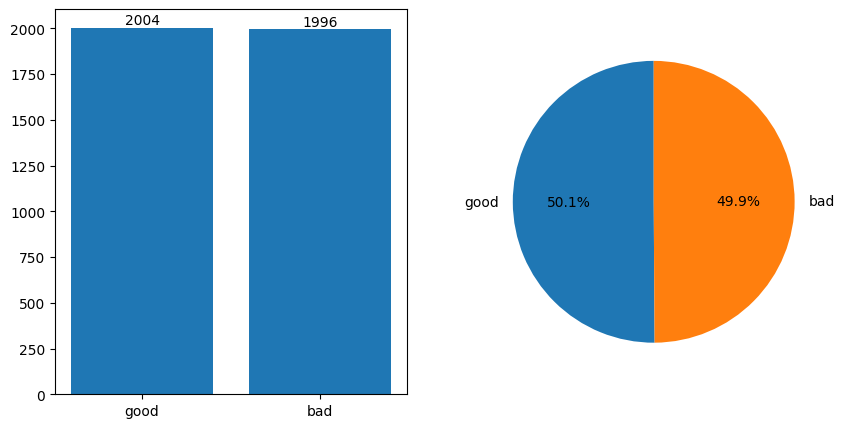

In [16]:
count_quality = dataframe['Quality'].value_counts()

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
bars = plt.bar(count_quality.index, count_quality.values)
for i, value in enumerate(count_quality.values):
    plt.text(i,value,f'{int(value)}',ha='center',va='bottom')

plt.subplot(1, 2, 2)
plt.pie(count_quality, labels=count_quality.index, autopct='%1.1f%%', startangle=90)

plt.show()

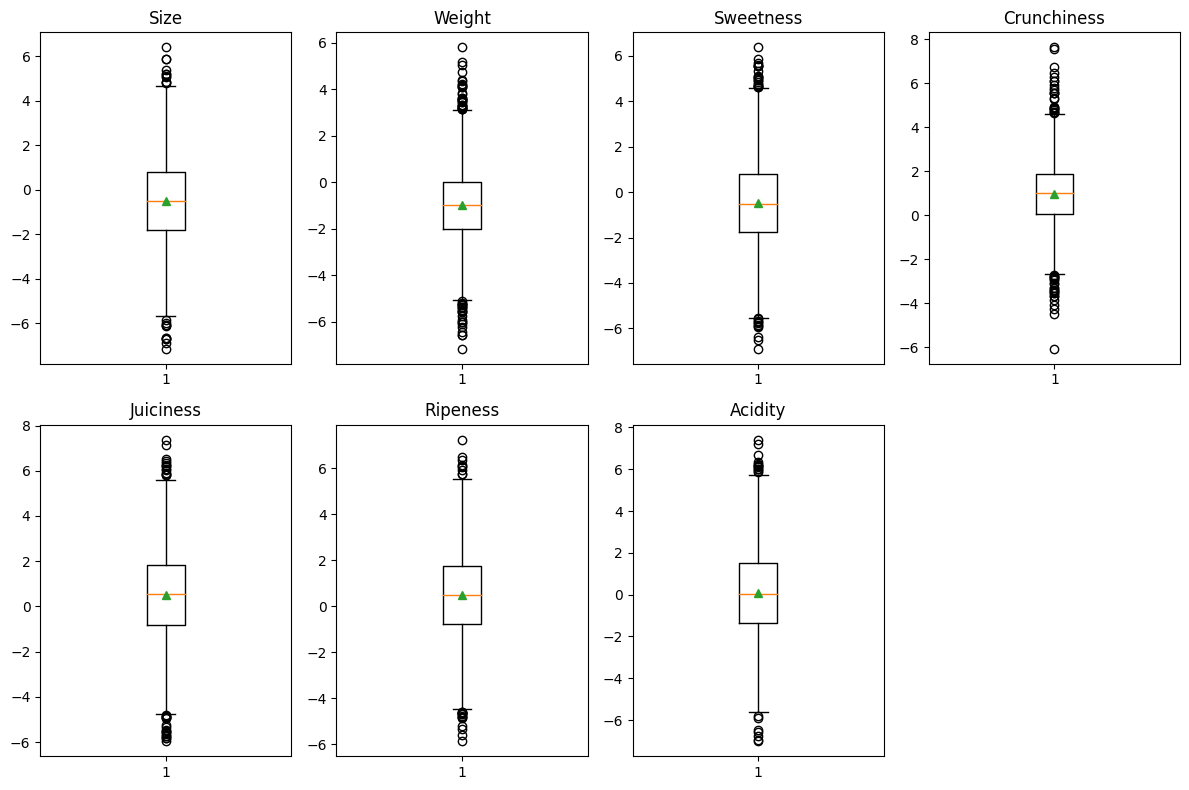

In [17]:
plt.figure(figsize=(12, 8))
for idx, c in enumerate(df.columns[:-1], start=1):
    plt.subplot(2, 4, idx, title=c).boxplot(df[c], showmeans=True)

plt.tight_layout()
plt.show()

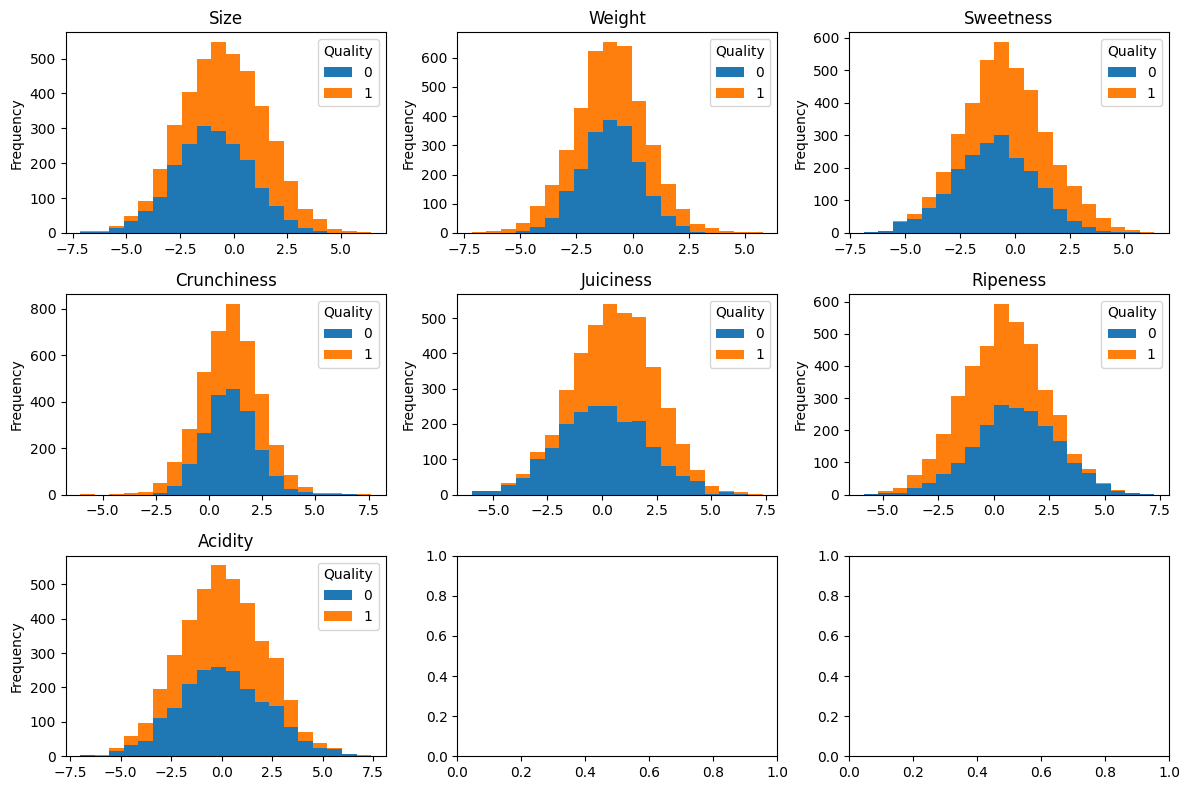

In [18]:
rows = 3
cols = 3

# Creazione della griglia di subplot
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

# Iterazione attraverso le colonne del DataFrame
for i, c in enumerate(df.columns[:-1]):
    row = i // cols
    col = i % cols
    ax = axes[row, col]

    ax.set_title(c)

    # Crea l'istogramma per la colonna corrente
    df.pivot(columns="Quality")[c].plot.hist(bins=20, stacked=True, ax=ax)

plt.tight_layout()
plt.show()


Dai grafici presentati, si osserva che le variabili mostrano una distribuzione equa all'interno dei range di valori. Inoltre, non sono presenti valori che si discostano significativamente dalla scala attesa, evitando la presenza di outliers. Questo è particolarmente positivo, poiché la presenza di valori anomali potrebbe influenzare negativamente l'analisi e la previsione.

L'assenza di valori fuori scala suggerisce che il dataset è ben preparato per l'elaborazione e l'addestramento di modelli senza la necessità di eliminare valori estremi che potrebbero distorcere i risultati.

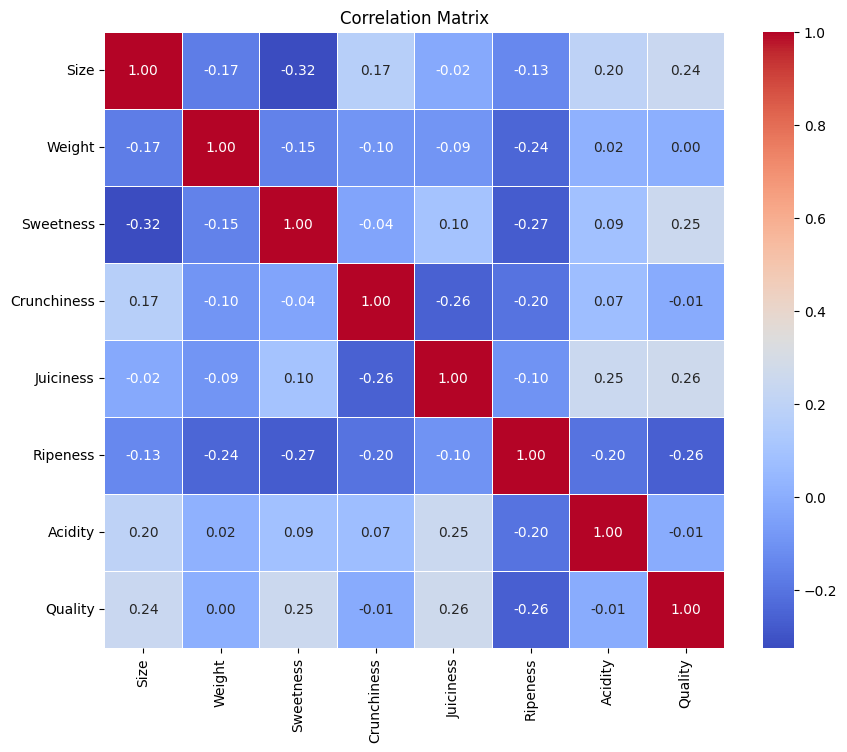

In [19]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

La __matrice di correlazione__ è uno strumento statistico che fornisce una rappresentazione delle relazioni tra le variabili del dataset. E' utilizzata per esaminare come le variazioni in una variabile siano associate alle variazioni di altre variabili.

La matrice di correlazione mostra i coefficienti di correlazione tra ciascuna coppia di variabili nel dataset.

I valori variano da -1 a 1:

* 1: Indica una correlazione perfetta positiva. Significa che all'aumentare di una variabile, l'altra aumenta proporzionalmente. Infatti lo troviamo come coefficente di relazione di una variabile con se stessa.

* 0: Indica assenza di correlazione. Le variabili non variano insieme.

* -1: Indica una correlazione perfetta negativa. Significa che all'aumentare di una variabile, l'altra diminuisce proporzionalmente.

Nel nostro caso troviamo:
- la massima correlazione positiva tra **Juiciness** e **Quality** pari a 0.26
- la massima correlazione negativa tra **Size** e **Sweetness** pari a -0.32
- una correlazione nulla tra **Weight** e **Quality** pari a 0

##Preparazione dei dati per l'addestramento

Isolo la variabile __Quality__ da predire (y) e le variabili predittive (X)

In [20]:
X = df.drop(columns=["Quality"], axis=1)
y = df["Quality"]

Suddivido i dati in un training set e in un validation set con la funzione `train_test_split`

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,  y, test_size=0.2, random_state=42)

In questo caso non ci sono altre operazioni di preprocessing da svolgere, in quanto tutte le variabili predittive sono numeriche e equamente bilanciate all'interno delle classi

###Funzioni di utilità

In [22]:
#Function to plot confusion matrix of test set
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(4, 3))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass))
    plt.show()

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def print_score(model):

    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    classification_rep = classification_report(y_val, y_pred)
    cm = confusion_matrix(y_val, y_pred)

    print(f'Accuracy: {accuracy:.2f}')
    print('Classification Report:')
    print(classification_rep)
    plot_confusion_matrix(cm, target_names=['bad', 'good'], normalize=False)

    return round(accuracy, 2)

##Addestramento, validazione di modelli e ricerca degli iperparametri migliori
- `Perceptron`
- `LogisticRegression`
- `RandomForestClassifier`
- `SVC`
- `MLPClassifier`

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [25]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(3, shuffle=True, random_state=42)

In [26]:
save_score = {}

###Perceptron
Il Perceptron è un modello di classificazione binaria che inizia con pesi e bias inizializzati casualmente. Durante l'addestramento, aggiorna i parametri proporzionalmente agli errori di classificazione rispetto al set di addestramento, iterando attraverso molteplici epoche.

In [27]:
from sklearn.linear_model import Perceptron

In [28]:
model = Pipeline([
    ("scaler", None),
    ("perceptron", Perceptron(random_state=42))
])

grid = [
    {
        "scaler": [None, StandardScaler(), MinMaxScaler()],
        "perceptron__penalty": ["l1", "l2", None],
        "perceptron__alpha": np.logspace(-5,0,6)
    },
    {
        "scaler": [None, StandardScaler(), MinMaxScaler()],
        "perceptron__penalty": ["elasticnet"],
        "perceptron__alpha": np.logspace(-5,0,6),
        "perceptron__l1_ratio": [0.1, 0.2, 0.4, 0.6, 0.8]
    }
]

ps_gs = GridSearchCV(model, grid, cv=skf)

%time ps_gs.fit(X_train, y_train)

CPU times: user 5.3 s, sys: 14.7 ms, total: 5.31 s
Wall time: 5.4 s


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', None),
                                       ('perceptron',
                                        Perceptron(random_state=42))]),
             param_grid=[{'perceptron__alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                          'perceptron__penalty': ['l1', 'l2', None],
                          'scaler': [None, StandardScaler(), MinMaxScaler()]},
                         {'perceptron__alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                          'perceptron__l1_ratio': [0.1, 0.2, 0.4, 0.6, 0.8],
                          'perceptron__penalty': ['elasticnet'],
                          'scaler': [None, StandardScaler(), MinMaxScaler()]}])

In [29]:
pd.DataFrame(ps_gs.cv_results_).sort_values("rank_test_score").head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_perceptron__alpha,param_perceptron__penalty,param_scaler,param_perceptron__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
77,0.011150,0.000787,0.003202,0.000075,0.0001,elasticnet,MinMaxScaler(),0.4,"{'perceptron__alpha': 0.0001, 'perceptron__l1_...",0.735708,0.713215,0.742964,0.730629,0.012665,1
66,0.007457,0.000878,0.004277,0.001922,0.00001,elasticnet,None,0.8,"{'perceptron__alpha': 1e-05, 'perceptron__l1_r...",0.691659,0.735708,0.732645,0.720004,0.020082,2
22,0.008363,0.001983,0.002687,0.000575,0.001,l2,StandardScaler(),NaN,"{'perceptron__alpha': 0.001, 'perceptron__pena...",0.701968,0.739456,0.706379,0.715935,0.016730,3


Best parameters: {'perceptron__alpha': 0.0001, 'perceptron__l1_ratio': 0.4, 'perceptron__penalty': 'elasticnet', 'scaler': MinMaxScaler()}
Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.50      0.63       401
           1       0.65      0.91      0.76       399

    accuracy                           0.71       800
   macro avg       0.75      0.71      0.69       800
weighted avg       0.75      0.71      0.69       800



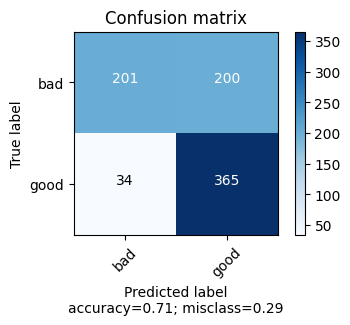

In [30]:
print('Best parameters:', ps_gs.best_params_)
save_score['Perceptron'] = print_score(ps_gs)

###Regressione Logistica

La regressione logistica è un modello di classificazione binaria basato sulla regressione lineare.
Utilizza la funzione logistica per trasformare una combinazione lineare di variabili indipendenti in una probabilità di appartenenza a una classe.
L'obiettivo è minimizzare la somma dei logaritmi delle probabilità stimando i pesi e i bias.

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = Pipeline([
    ("scaler", None),
    ("lr", LogisticRegression(solver="saga", random_state=42))
])
grid = [
    {
        "scaler": [None, StandardScaler(), MinMaxScaler()],
        "lr__penalty": ["l2","l1"],
        "lr__C": np.logspace(-2,2,5)
    },
    {
        "lr__penalty": ["elasticnet"],
        "lr__C": np.logspace(-2, 2, 5),
        "lr__l1_ratio": [0.1, 0.2, 0.3, 0.4, 0.5]
    }
]
lr_gs = GridSearchCV(model, grid, cv=skf)
%time lr_gs.fit(X_train,y_train)

CPU times: user 2.26 s, sys: 5.01 ms, total: 2.26 s
Wall time: 2.27 s


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', None),
                                       ('lr',
                                        LogisticRegression(random_state=42,
                                                           solver='saga'))]),
             param_grid=[{'lr__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'lr__penalty': ['l2', 'l1'],
                          'scaler': [None, StandardScaler(), MinMaxScaler()]},
                         {'lr__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'lr__l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5],
                          'lr__penalty': ['elasticnet']}])

In [33]:
pd.DataFrame(lr_gs.cv_results_).sort_values("rank_test_score").head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,param_lr__penalty,param_scaler,param_lr__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
54,0.010574,0.000548,0.002259,0.000063,100.0,elasticnet,NaN,0.5,"{'lr__C': 100.0, 'lr__l1_ratio': 0.5, 'lr__pen...",0.741331,0.749766,0.750469,0.747189,0.004152,1
52,0.010221,0.000342,0.002290,0.000076,100.0,elasticnet,NaN,0.3,"{'lr__C': 100.0, 'lr__l1_ratio': 0.3, 'lr__pen...",0.741331,0.749766,0.750469,0.747189,0.004152,1
51,0.009981,0.000540,0.002155,0.000071,100.0,elasticnet,NaN,0.2,"{'lr__C': 100.0, 'lr__l1_ratio': 0.2, 'lr__pen...",0.741331,0.749766,0.750469,0.747189,0.004152,1


Best parameters: {'lr__C': 100.0, 'lr__penalty': 'l2', 'scaler': None}
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       401
           1       0.75      0.75      0.75       399

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



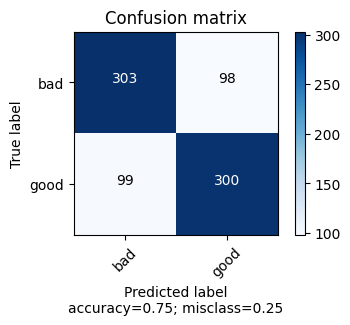

In [34]:
print('Best parameters:', lr_gs.best_params_)
save_score['LogisticRegression'] = print_score(lr_gs)

###Random Forest Classifier
Random Forest è un algoritmo di bagging che crea diversi alberi decisionali simultaneamente, ognuno su un sottoinsieme del dataset di training. Gli alberi non vengono potati, rendendoli specifici per il subset. La previsione finale è la media delle previsioni degli alberi, fornendo un miglioramento delle prestazioni rispetto a un singolo albero.

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
model = Pipeline([
    ("scaler", None),
    ("rfc", RandomForestClassifier(n_jobs=-1, random_state=3))
])

grid = [
    {
        "scaler": [None, StandardScaler(), MinMaxScaler()],
        "rfc__n_estimators": [100, 200],
        "rfc__max_depth": [2, 10],
        "rfc__min_samples_leaf": [1, 4],
        "rfc__min_samples_split": [2, 10]
    }
]

rfc_gs = GridSearchCV(model, grid, cv=skf)
%time rfc_gs.fit(X_train, y_train)

CPU times: user 1min 54s, sys: 4.68 s, total: 1min 58s
Wall time: 1min 33s


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', None),
                                       ('rfc',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=3))]),
             param_grid=[{'rfc__max_depth': [2, 10],
                          'rfc__min_samples_leaf': [1, 4],
                          'rfc__min_samples_split': [2, 10],
                          'rfc__n_estimators': [100, 200],
                          'scaler': [None, StandardScaler(), MinMaxScaler()]}])

Best parameters: {'rfc__max_depth': 10, 'rfc__min_samples_leaf': 4, 'rfc__min_samples_split': 10, 'rfc__n_estimators': 200, 'scaler': None}
Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       401
           1       0.89      0.92      0.91       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



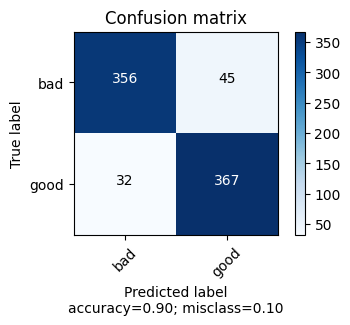

In [37]:
print('Best parameters:', rfc_gs.best_params_)
save_score['RandomForestClassifier'] = print_score(rfc_gs)

###SVC
Support Vector Machine, è un algoritmo di classificazione che trasforma lo spazio dei dati in modo che le classi diventino separabili linearmente, determinando l'iperpiano di separazione ottimale.

In [38]:
from sklearn.svm import SVC

In [39]:
model = Pipeline([
    ("scaler", None),
    ("svc", SVC(random_state=42))
])

grid = [
  {
      "scaler": [None, StandardScaler(), MinMaxScaler()],
      "svc__kernel": ['linear'],
      "svc__C": [0.01, 0.1, 1],
  },
  {
      "scaler": [None, StandardScaler(), MinMaxScaler()],
      "svc__gamma": ['scale'],
      "svc__kernel": ['rbf'],
      "svc__C": [0.01, 0.1, 1],
  }
]

svc_gs = GridSearchCV(model, grid, cv=skf)
%time svc_gs.fit(X_train, y_train)

CPU times: user 12.8 s, sys: 160 ms, total: 12.9 s
Wall time: 13 s


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', None),
                                       ('svc', SVC(random_state=42))]),
             param_grid=[{'scaler': [None, StandardScaler(), MinMaxScaler()],
                          'svc__C': [0.01, 0.1, 1], 'svc__kernel': ['linear']},
                         {'scaler': [None, StandardScaler(), MinMaxScaler()],
                          'svc__C': [0.01, 0.1, 1], 'svc__gamma': ['scale'],
                          'svc__kernel': ['rbf']}])

Best parameters: {'scaler': MinMaxScaler(), 'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       401
           1       0.90      0.91      0.91       399

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



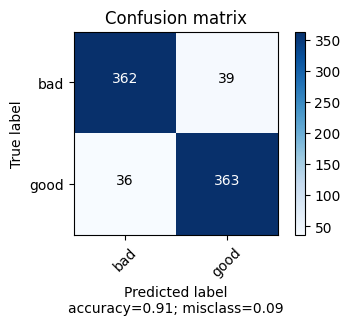

In [40]:
print('Best parameters:', svc_gs.best_params_)
save_score['SVC'] = print_score(svc_gs)

###MLP Classifier
Multi-Layer Perceptron Classifier è un modello di rete neurale artificiale con strati multipli di nodi interconnessi da pesi. Utilizza funzioni di attivazione non lineari e adotta la retropropagazione dell'errore per ottimizzare i pesi e migliorare la capacità di classificazione.

In [41]:
from sklearn.neural_network import MLPClassifier

In [42]:
mlp = Pipeline([
    ("scaler", StandardScaler()),
    ('mlp', MLPClassifier(activation="relu", max_iter=2000, random_state=42))
])
%time mlp.fit(X_train, y_train)

CPU times: user 24.1 s, sys: 20 s, total: 44 s
Wall time: 24.9 s


Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp', MLPClassifier(max_iter=2000, random_state=42))])

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       401
           1       0.95      0.96      0.96       399

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.96      0.96      0.96       800



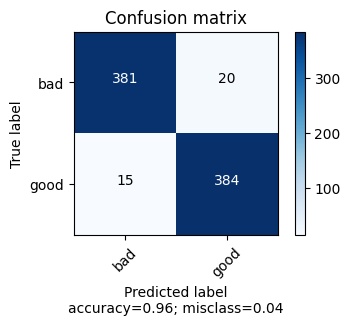

In [43]:
save_score['MLPClassifier'] = print_score(mlp)

##Valutazione degli score ottenuti

In [44]:
scores = pd.DataFrame(save_score.items(), columns=['Model', 'Accuracy']).set_index('Model')
scores.sort_values(by='Accuracy', ascending=False)

,Accuracy
Model,
MLPClassifier,0.96
SVC,0.91
RandomForestClassifier,0.90
LogisticRegression,0.75
Perceptron,0.71


Il modello che ha ottenuto un punteggio maggiore è __MLPClassifier__, in grado di classificare correttamente il __96%__ delle mele

Ora confrontiamo MLPClassifier con un modello casuale (DummyClassifier)

Accuracy: 0.48
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.46      0.47       401
           1       0.48      0.50      0.49       399

    accuracy                           0.48       800
   macro avg       0.48      0.48      0.48       800
weighted avg       0.48      0.48      0.48       800



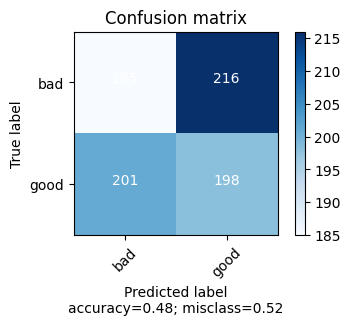

In [45]:
from sklearn.dummy import DummyClassifier

random = DummyClassifier(strategy="uniform", random_state=42)
random.fit(X_train, y_train)
_ = print_score(random)

Dal modello casuale otteniamo una accuratezza molto inferiore, pari al 48%, rispetto al 96% del MLPClassifier

##Conclusioni

I risultati sono molto positivi, poiché il modello `MLPClassifier` fornisce una classificazione molto accurata, quasi completa. Nonostante il fatto che `MLPClassifier` richieda più tempo rispetto ai modelli `Perceptron` e `LogisticRegression`, che includono anche una ricerca nella griglia (gridSearch), ottiene punteggi significativamente migliori, con un aumento di circa il 20%. Ciò è dovuto al fatto che `MLPClassifier` è un modello più flessibile ma allo stesso tempo anche più complesso rispetto agli altri, infatti è in grado di catturare anche relazioni non lineari tra i dati. Tuttavia, questo comporta una minore interpretabilità del processo decisionale e può essere più oneroso in termini computazionali.

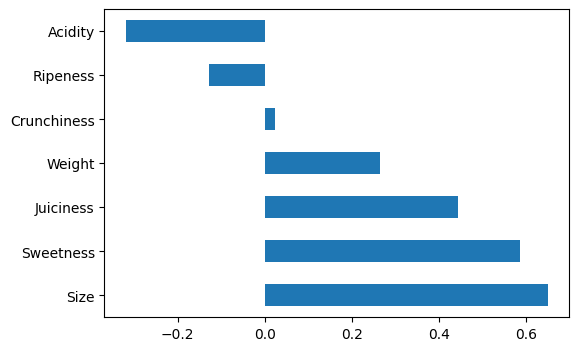

In [46]:
plt.figure(figsize=(6,4))
lr_imp = pd.Series(lr_gs.best_estimator_[1].coef_[0], index=X_train.columns)
lr_imp.nlargest(7).plot(kind='barh');

Mentre per quanto riguarda le variabili notiano che:
- l'acidità e la maturità aumentando influiscono negativamente sulla qualità della mela
- la dimensione e la dolcezza sono le due variabili che influiscono maggiormente in positivo sulla qualità delle mele